In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data=load_breast_cancer()

In [3]:
X=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [4]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
tree=DecisionTreeClassifier(max_depth=1,random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [10]:
adaboost=AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

In [11]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [13]:
stump_pred = tree.predict(X_test)
adaboost_pred = adaboost.predict(X_test)


In [14]:

stump_acc = accuracy_score(y_test, stump_pred)
stump_auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])


In [15]:

adaboost_acc = accuracy_score(y_test, adaboost_pred)
adaboost_auc = roc_auc_score(y_test, adaboost.predict_proba(X_test)[:,1])


In [16]:

results = pd.DataFrame({
    'Model': ['Decision Stump', 'AdaBoost'],
    'Accuracy': [stump_acc, adaboost_acc],
    'ROC-AUC': [stump_auc, adaboost_auc]
})


In [17]:

print("Performance Comparison:")
print(results.to_string(index=False))


Performance Comparison:
         Model  Accuracy  ROC-AUC
Decision Stump  0.894737 0.897150
      AdaBoost  0.964912 0.992466


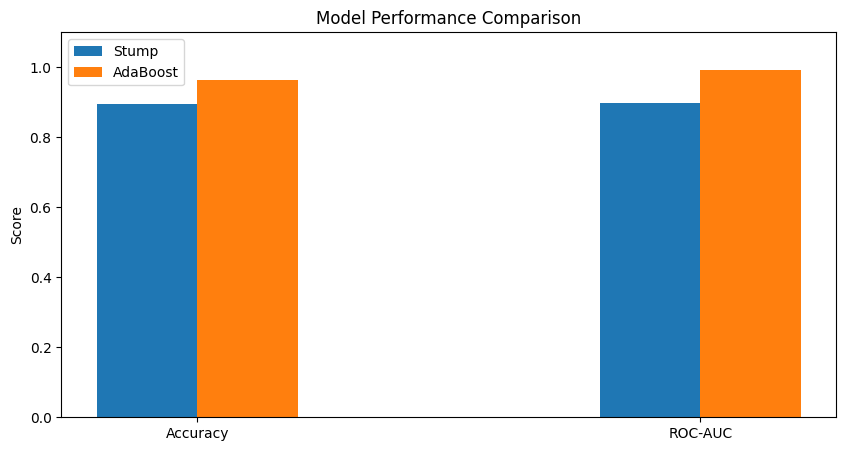

In [18]:

plt.figure(figsize=(10, 5))
x = np.arange(2)
plt.bar(x - 0.1, [stump_acc, stump_auc], width=0.2, label='Stump')
plt.bar(x + 0.1, [adaboost_acc, adaboost_auc], width=0.2, label='AdaBoost')
plt.xticks(x, ['Accuracy', 'ROC-AUC'])
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


In [19]:

print("\nKey Insight:")
print(f"AdaBoost improved accuracy by {adaboost_acc-stump_acc:.2%} and ROC-AUC by {adaboost_auc-stump_auc:.2%}")
print("by combining 50 weak decision stumps, demonstrating the power of ensemble learning.")


Key Insight:
AdaBoost improved accuracy by 7.02% and ROC-AUC by 9.53%
by combining 50 weak decision stumps, demonstrating the power of ensemble learning.
